### Linear Regression
- is a statistical machine learning method you can use to quantify and make predictions based on relationships between numerical variables.
    Main types
    - Simple - one predictor and one predictant
    - Multiple - multiple predictor and one predictant
- used for sales forecasting, supply cost forecasting..
#### Assumptions
- continous numeric, not categorical
- data is free of missing values and outliers
- linear relationshup between predictors and predictant
- all predictors are independent of each other
- residuals(prediction errors) are normally distributed


General Linear Regression
Model is y = b + mx

determine trick or treaters this year. use enrolment numbers for middle school
trickortreaters = 25 + 0.01 X 1000 (middleschoolenrollment)
 - 25 is the baseline - number of trick or treaters
 - 0.01 - increase the number of trick or treaters i expect by 0.01 
 - 1000 - this is the number of students
 trickortreaters = 35 - but this doesn't happen in reality
 
 when halloween came around, the value became 42
  42 = 35 
 
 data = model + error
 42 = 35 + 7 
 
 error = deviation from our model. data is not an error but the model is
 
 
#### Segment 1 - simple linear regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 10,8

In [4]:
#Create synthetic values

rooms = 2*np.random.randn(100, 1) + 3 # populate the rooms field
rooms[1:10]

array([[-0.04168045],
       [ 4.35183486],
       [ 1.02581346],
       [ 4.97442464],
       [ 3.37449054],
       [ 3.05016563],
       [ 1.14360196],
       [ 2.43003984],
       [ 4.04944934]])

In [5]:
price = 265 + 6 * rooms + abs(np.random.randn(100, 1))
price[1:10]

array([[265.13558265],
       [291.25202001],
       [271.81440009],
       [295.37160168],
       [285.93616284],
       [283.98535376],
       [272.16761921],
       [279.99753485],
       [290.27831179]])

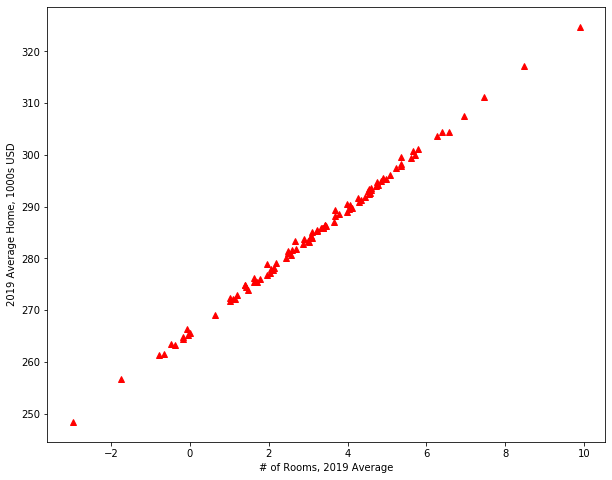

In [6]:
plt.plot(rooms, price, 'r^') #x, y, r^ specifies that a point plot  should be generated instead of the default line plot
plt.xlabel('# of Rooms, 2019 Average')
plt.ylabel('2019 Average Home, 1000s USD')
plt.show()

# there is a linear relationship and continuous
# as the number of rooms increase, the price of the house increase

In [7]:
# we're using rooms as predictors

X = rooms
y = price

LinReg = LinearRegression()
#fit the model to the data
LinReg.fit(X, y)
print(LinReg.intercept_, LinReg.coef_)

[265.83157721] [[6.00438551]]


Simple Algebra

* y = mx+b
* b = intercept = 265.6

Estimated coefficients
* LinReg.coef_ = [6.01] Estimated coefficients for the terms in the linear regression problem.



In [8]:
# look on how the model performed

print(LinReg.score(X,y)) # returns the coefficient of the determination which is the r squared of the prediction

0.9980864974483645


our model is performing really well as our score is close to 1. Each time running this code, we will get a different value due to random values

#### Segment 2 - Multiple Linear Regression

In [9]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

In [10]:
address = 'C:/Users/marjo/PycharmProjects/Summer_2020_Challenge/Data/enrollment_forecast.csv'

#create a dataframe
enroll = pd.read_csv(address)
enroll.columns = ['year','roll', 'unem', 'hgrad', 'inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


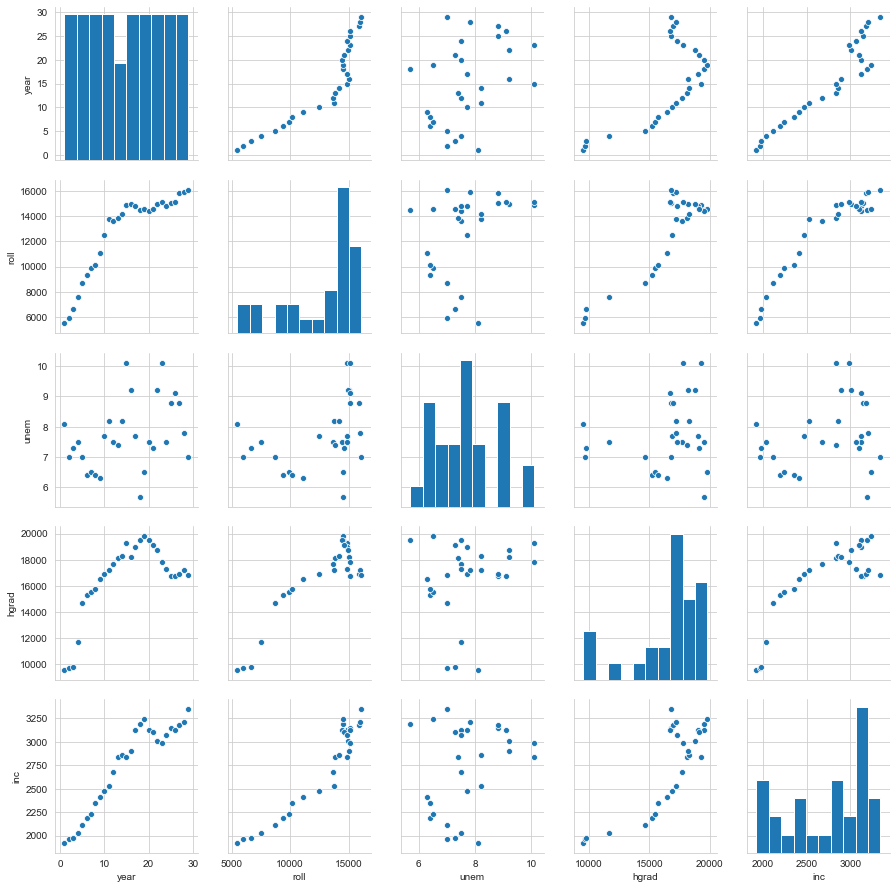

In [11]:
#assumptions: it should be continuous, there is linear relationship between predictors and predictant

sb.pairplot(enroll)
# relationship between unemployment and enrollment
# there could be a linear relationship but it could be stronger

#hgrad and enrollment linear pair - continous

In [12]:
print(enroll.corr())

#regression should not be dependent on one another
# hgrad and unem are definitely not showing linear correlation, which is good news

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [13]:
enroll_data = enroll[['unem', 'hgrad']].values

enroll_target = enroll[['roll']].values

enroll_data_names = ['unem', 'hgrad']

# scale x and y

X,y = scale(enroll_data), enroll_target

#### Checking for missing values

In [14]:
missing_values = X== np.NAN
X[missing_values == True]

#it will show an empty array which is correct because there is no missing values

array([], dtype=float64)

In [15]:
# instantiate - tells linregression to normalize
LinReg = LinearRegression(normalize=True)

LinReg.fit(X, y) 

print(LinReg.score(X,y))

# R squared prediction, it's a measure of how well the regression line that was predicted
# by the model that matches the real values for college enrollment. 
# it tells us how well the model performs in predicting college enrollment. 
# a maximum good score would be .99 and a min would be .01
# if you see a value of one or zero then there is something wrong with your model


0.8488812666133723


#### Segment 3 - Logistic Regression

- a simple machine learning method you can use to predict the value of a numeric categorical variable based on its relationship with predictor variables.

the difference with linear regression: you're predicting values for numeric continous variables

#### Use Cases
- Customer Churn analysis
- Employee Attrition Modeling

#### Assumptions
- data is free of missing values
- predictant variable is binary(accepts two values) or ordinal(categorical with ordered values_
- all predictors are independent of each other
- at least 50 observations per predictor variable

#### Logistic regression on the titanic dataset

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [22]:
address = 'C:/Users/marjo/PycharmProjects/Summer_2020_Challenge/Data/titanic-training-data.csv'

titanic_training = pd.read_csv(address)
titanic_training.columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
print(titanic_training.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [23]:
print(titanic_training.info())

# the basic information - 891 records, 891 passengers but there are missing values
# see  cabin numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


#### Variable Descriptions

- Survived = Survival(0 = No; 1=Yes)
- Pclass = Passenger Class(1=1st, 2=2nd, 3=3rd
- Name = Name
- Sex = Sex
- Age = Age
- SibSp = Number of Siblings/Spouse Aboard
- Parch = Number of Parents/Children Aboard
- Ticket = Ticket Number
- Fare = Passenger Fare(British Pound)
- Cabin = Cabin
- Embarked = Port of Embarkation (C=Cherbourg, France; Q=Queenstown, UK; S=Southampton-Cobh, Ireland)

#### Checking that your target variable is binary

Predict survival

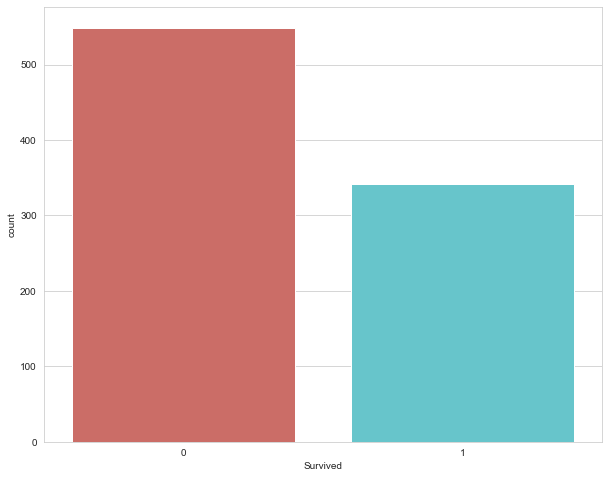

In [24]:
sb.countplot(x='Survived', data=titanic_training, palette='hls')
#we have 0 and 1 - binary variable

#### Checking for missing values

In [25]:
titanic_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
titanic_training.describe()
# another way to check the count of the rows
# summary of statistics of each of the variables


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Taking care of missing values

##### Dropping missing values

So let's go ahead and drop all the variables that aren't relevant for predicting survival. We should at least keep the following:

- Survived - this variable is obviously relevant
- Pclass - Does a passenger's class on the boat affect their survivability
- Sex - Could a passenger's gender impact their survival rate?
- Age - does a person's age impact their survival rate
- SibSp - does the number of relatives on the boat(that are siblings or a spouse) affect a person survivability? probability
- Parch - does the number of relatives on the boat(that are children or parents) affect a person survivability?Probability
- Fare - does the fare a person paid effect his survivability? maybe
- Embarked - does a person's point of embarkation matter? it depends on how the boat was filled.

What about a person's name, ticket number and passenger ID? They're irrelevant for predicting survivability. And as you recall, the cabin variable is almost all missing values, so we can just drop all of these

Drop all the values that are irrelevant

In [28]:
titanic_data = titanic_training.drop(['Name', 'Ticket', 'Cabin'], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


#### Inputting missing values

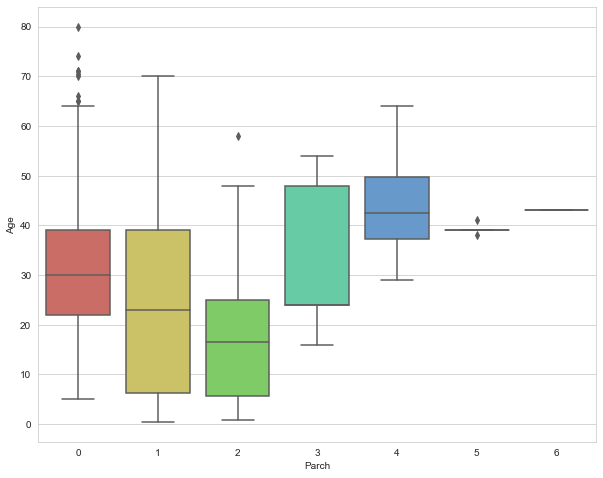

In [29]:
sb.boxplot(x='Parch', y='Age', data=titanic_data, palette='hls')

In [31]:
Parch_groups = titanic_data.groupby(titanic_data['Parch'])
Parch_groups.mean()

# to interpret = if they have 1 parent or child on a boat, average age is 24
# if 2 - either parent or child, average age is 17

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [32]:
def age_approx(cols):
    Age = cols[0]
    Parch = cols[1]
    
    # loop thru any of the rows where age has a null value and make an approximation,
    # or basically assign a value based on parch category
    
    if pd.isnull(Age):
        if Parch== 0:
            return 32 # why 32? looking at the data above, the average is 32
        elif Parch== 1:
            return 24
        elif Parch== 2:
            return 17
        elif Parch== 3:
            return 33
        elif Parch== 4:
            return 45
        else:
            return 30 #why 30? look at output 27, the average age is 29.6
    else:
        return Age

In [33]:
titanic_data['Age'] = titanic_data[['Age', 'Parch']].apply(age_approx, axis=1)
#check for missing values
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [35]:
titanic_data.dropna(inplace=True)
#reset index
titanic_data.reset_index(inplace=True, drop=True)

print(titanic_data.info())

#889 because we dropped two rows which Embarked has

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB
None


#### Converting categorical variables to a dummy indicators

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

gender_cat = titanic_data['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 0, 0, 0, 1])

In [37]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [38]:
# 1 = male, 0 = female

gender_DF = pd.DataFrame(gender_encoded, columns=['male_gender'])
gender_DF.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


In [41]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:100]

#it transformed to numbers from S and C

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [42]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories='auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_DF = pd.DataFrame(embarked_1hot_mat, columns=['C', 'Q', 'S'])
embarked_DF.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [43]:
titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [44]:
titanic_dmy = pd.concat([titanic_data, gender_DF, embarked_DF], axis=1, verify_integrity=True).astype(float)
titanic_dmy[0:5]


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


#### Checking for independence between features